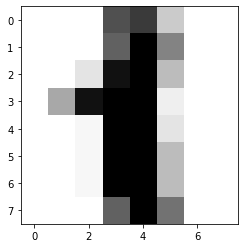

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target
plt.imshow(X[1].reshape(8, 8), cmap="Greys")

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

print("Confusion matrix:", confusion_matrix(y_train_5, y_train_pred))
print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))
print("F1 Score:", f1_score(y_train_5, y_train_pred))

Confusion matrix: [[1197    6]
 [   9  135]]
Precision: 0.9574468085106383
Recall: 0.9375
F1 Score: 0.9473684210526315


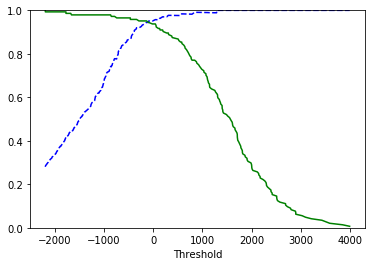

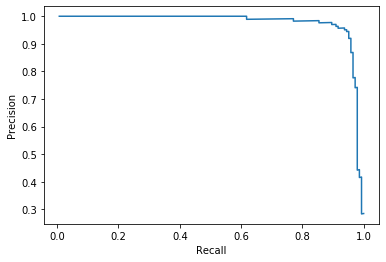

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylim((0,1))
plt.show()

plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

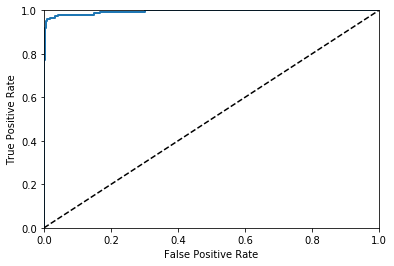

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
plot_roc(fpr, tpr)

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9943890274314213

c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


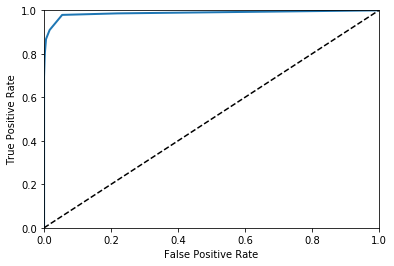

0.9872742911240417

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plot_roc(fpr_forest, tpr_forest)
plt.show()
roc_auc_score(y_train_5, y_scores_forest)

In [50]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[1]])

sgd_clf.decision_function([X[1]])

array([[-6189.92582678,  1720.69632889, -3884.46046001, -2406.82111324,
        -2095.68655914, -2372.94060417, -1490.14259582, -2695.87692733,
        -1670.36984623, -1349.07404883]])

In [57]:
print("SGD:", cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))
print("Random Forest:", cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy"))

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

print("SGD Scaled:", cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))
print("Random Forest Scaled:", cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

SGD: [0.93362832 0.95545657 0.95515695]
Random Forest: [0.92920354 0.94209354 0.94394619]
SGD Scaled: [0.94690265 0.94877506 0.94618834]
Random Forest Scaled: [0.93362832 0.9376392  0.93946188]


c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

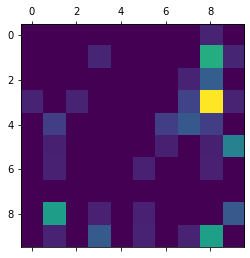

In [69]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_train_pred)

row_sums = conf_mat.sum(axis=1, keepdims=True)
normed_mat = conf_mat / row_sums 
np.fill_diagonal(normed_mat, 0)
plt.matshow(normed_mat)

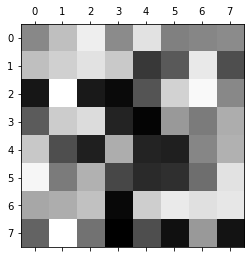

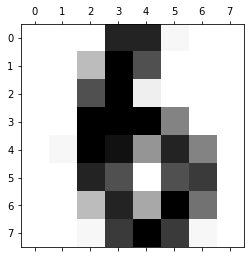

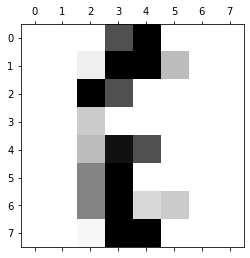

In [79]:
noise = np.random.randint(0, 100, (len(X_train), 64))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 64))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

def plot_digit(digit):
    reshaped = digit.reshape((8, 8))
    plt.matshow(reshaped, cmap="Greys")
    
plot_digit(X_test_mod[1])
plot_digit(y_test_mod[1])
plot_digit(knn_clf.predict([X_test_mod[1]])[0])

In [86]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(knn_clf, [{
        "weights": ["uniform", "distance"],
        "n_neighbors": [1, 2, 3, 5, 8, 13]
    }], scoring="accuracy")

search.fit(X_train, y_train)
best = search.best_estimator_

from sklearn.metrics import accuracy_score

accuracy_score(y_test, best.predict(X_test))

c:\users\lars\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9866666666666667